In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [3]:
bostonDataFrame = pd.read_csv('drive/MyDrive/Colab Notebooks/Modulo III: Machine Learning/Datasets/2021-06-15-ROLAND 600 VERTICAL-2142.csv')
#bostonDataFrame['MEDV'] = boston_dataset.target
bostonDataFrame.head()

,Fecha,Nombre del dispositivo,Temperatura,Temperatura minima,Temperatura maxima,Vibracion pico X,Vibracion pico Y,Vibracion pico Z,Vibracion pico pico X,Vibracion pico pico Y,Vibracion pico pico Z,Vibracion RMS X,Vibracion RMS Y,Vibracion RMS Z,Voltaje de la bateria
0,2021-06-15 00:00:07,ROLAND 600 VERTICAL,39.25,39,43.5,0.015381,0.011475,0.013672,0.025635,0.02124,0.026367,0.003418,0.003418,0.004395,3.63
1,2021-06-15 00:05:05,ROLAND 600 VERTICAL,39.25,39,43.5,0.015381,0.011475,0.013672,0.025635,0.02124,0.026367,0.003418,0.003418,0.004395,3.63
2,2021-06-15 00:10:06,ROLAND 600 VERTICAL,39.25,39,43.5,0.015381,0.011475,0.013672,0.025635,0.02124,0.026367,0.003418,0.003418,0.004395,3.63
3,2021-06-15 00:15:06,ROLAND 600 VERTICAL,39.25,39,43.5,0.015381,0.011475,0.013672,0.025635,0.02124,0.026367,0.003418,0.003418,0.004395,3.63
4,2021-06-15 00:20:05,ROLAND 600 VERTICAL,39.25,39,43.5,0.015381,0.011475,0.013672,0.025635,0.02124,0.026367,0.003418,0.003418,0.004395,3.63


In [4]:
#Aqui elegiremos 2 campos: Porcentaje de personas de estatos bajos, y cantidad promedio de habitaciones por vivienda.
X = bostonDataFrame[['Temperatura minima', 'Temperatura maxima']]
Y = bostonDataFrame['Temperatura']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


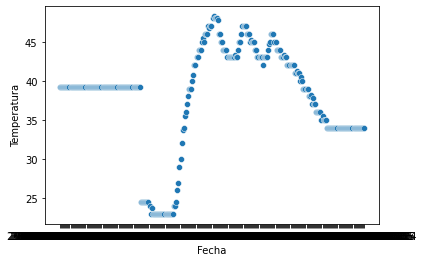

In [5]:
sns.scatterplot(bostonDataFrame['Fecha'], bostonDataFrame['Temperatura']);

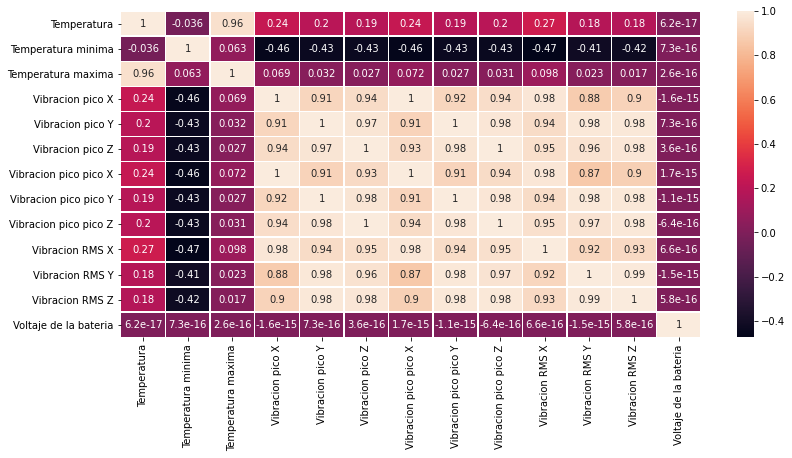

In [6]:
plt.figure(figsize=(13, 6))
sns.heatmap(bostonDataFrame.corr(), annot=True, linewidths=.5);

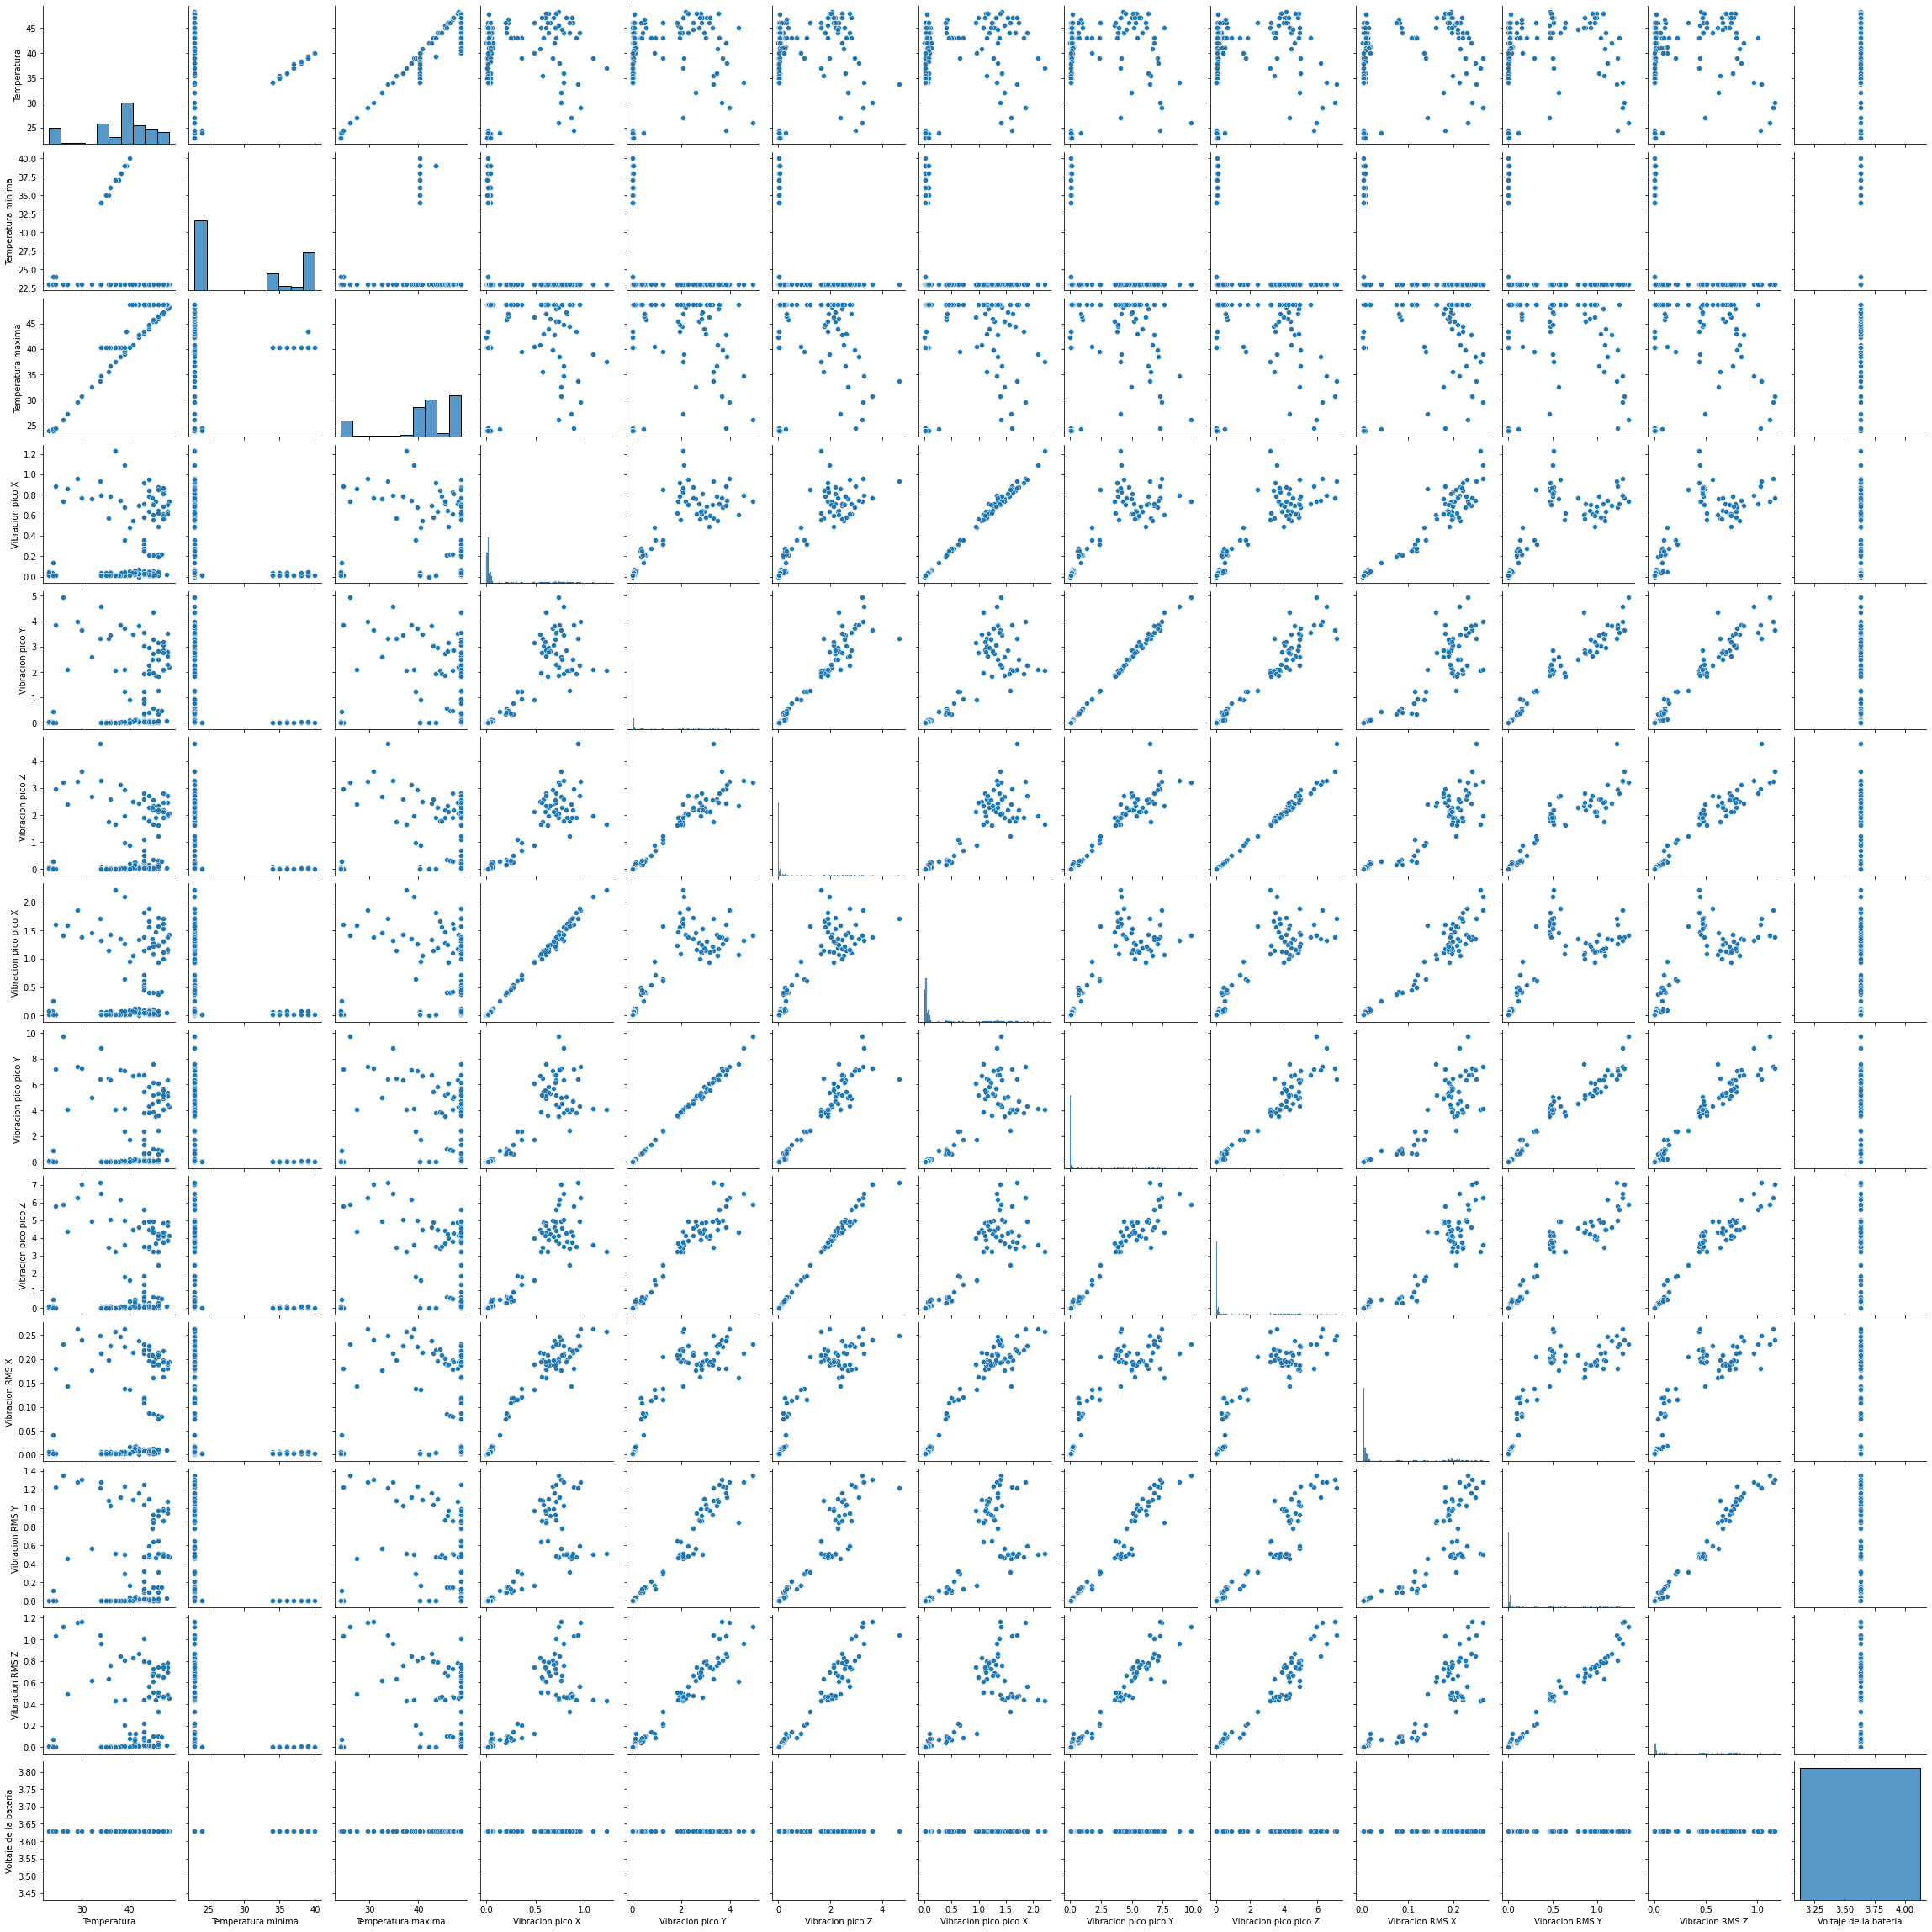

In [ ]:
sns.pairplot(bostonDataFrame);

In [7]:
#Aqui vamos a dividir los datos en Train y Test y entrenaremos un regresor lineal para obtener lo mejor que pueda una predicción sobre el precio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(171, 2)
(115, 2)
(171,)
(115,)


##Ejemplo lineal:
Primero probaremos con predicciones lineales

In [8]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)
y_train_predict = lin_model.predict(X_train)
MSE = mean_squared_error(Y_train,y_train_predict)
print("Entrenamiento: MSE ="+str(MSE))

y_test_predict = lin_model.predict(X_test)
MSE = (mean_squared_error(Y_test, y_test_predict))
print("Pruebas: MSE ="+str(MSE))

df_predicciones = pd.DataFrame({'valor_real':Y_test, 'prediccion':y_test_predict, 'diferencia':Y_test-y_test_predict})
df_predicciones = df_predicciones.reset_index(drop = True)
df_predicciones.head(10)

Entrenamiento: MSE =3.1479257017887097
Pruebas: MSE =3.3494697652445136


,valor_real,prediccion,diferencia
0,37.00,36.024087,0.975913
1,37.00,34.870588,2.129412
2,45.00,44.415283,0.584717
3,43.00,44.415283,-1.415283
4,45.25,44.415283,0.834717
5,24.50,23.756902,0.743098
6,32.00,30.628501,1.371499
7,45.00,44.415283,0.584717
8,41.00,44.415283,-3.415283
9,42.00,44.415283,-2.415283


##Ejemplo de polinomio de grado 2
Ahora probaremos con un polinomio de grado 2

In [12]:
poly_model = LinearRegression()
poly = PolynomialFeatures(degree=2)

Xpolytrain = poly.fit_transform(X_train)
Xpolytest = poly.fit_transform(X_test)

poly_model.fit(Xpolytrain, Y_train)
y_train_predict = poly_model.predict(Xpolytrain)

MSE = mean_squared_error(Y_train,y_train_predict)
print("Entrenamiento: MSE ="+str(MSE))

y_test_predict = poly_model.predict(Xpolytest)
MSE = (mean_squared_error(Y_test, y_test_predict))
print("Pruebas: MSE ="+str(MSE))

df_predicciones = pd.DataFrame({'valor_real':Y_test, 'prediccion':y_test_predict, 'diferencia':Y_test-y_test_predict})
df_predicciones = df_predicciones.reset_index(drop = True)
df_predicciones.head(200)

Entrenamiento: MSE =1.51455074462243
Pruebas: MSE =1.6223491530280767


,valor_real,prediccion,diferencia
0,37.00,36.713187,0.286813
1,37.00,38.094261,-1.094261
2,45.00,44.218048,0.781952
3,43.00,44.218048,-1.218048
4,45.25,44.218048,1.031952
...,...,...,...
110,23.00,23.355700,-0.355700
111,44.00,44.218048,-0.218048
112,44.00,42.315327,1.684673
113,43.00,44.218048,-1.218048
